<a href="https://www.kaggle.com/code/vladxavier/mnist-from-scratch?scriptVersionId=190341511" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\MNIST-from-scratch-main\MNIST-from-scratch-main\data\train.csv\train.csv")

In [8]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [11]:
Y_train

array([6, 7, 7, ..., 7, 2, 8], shape=(41000,))

In [13]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [14]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [15]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 8 0 ... 5 1 1] [6 7 7 ... 7 2 8]
0.10963414634146341
Iteration:  10
[2 8 0 ... 5 6 3] [6 7 7 ... 7 2 8]
0.24073170731707316
Iteration:  20
[6 8 5 ... 5 3 3] [6 7 7 ... 7 2 8]
0.3588292682926829
Iteration:  30
[6 8 5 ... 5 3 3] [6 7 7 ... 7 2 8]
0.4346341463414634
Iteration:  40
[6 8 5 ... 5 3 3] [6 7 7 ... 7 2 8]
0.49260975609756097
Iteration:  50
[6 9 5 ... 7 3 3] [6 7 7 ... 7 2 8]
0.5428780487804878
Iteration:  60
[6 9 7 ... 7 3 3] [6 7 7 ... 7 2 8]
0.5815365853658536
Iteration:  70
[6 9 7 ... 7 3 3] [6 7 7 ... 7 2 8]
0.6130975609756097
Iteration:  80
[6 9 7 ... 7 3 3] [6 7 7 ... 7 2 8]
0.6403414634146342
Iteration:  90
[6 9 7 ... 7 3 3] [6 7 7 ... 7 2 8]
0.6624634146341464
Iteration:  100
[6 9 7 ... 7 3 3] [6 7 7 ... 7 2 8]
0.6801951219512196
Iteration:  110
[6 9 7 ... 7 3 3] [6 7 7 ... 7 2 8]
0.6957560975609756
Iteration:  120
[6 9 7 ... 7 3 3] [6 7 7 ... 7 2 8]
0.7099268292682926
Iteration:  130
[6 9 7 ... 7 3 3] [6 7 7 ... 7 2 8]
0.7225121951219512
Iteration:  14

**~83% accuracy on training set.**

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

**Let's try some example's:**

Prediction:  [6]
Label:  6


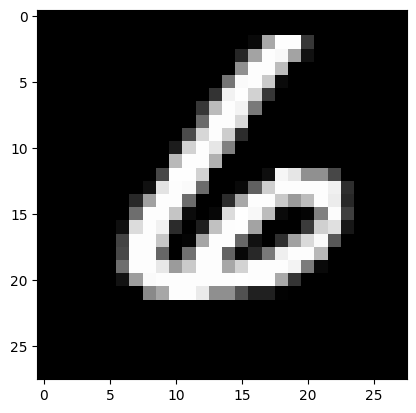

Prediction:  [7]
Label:  7


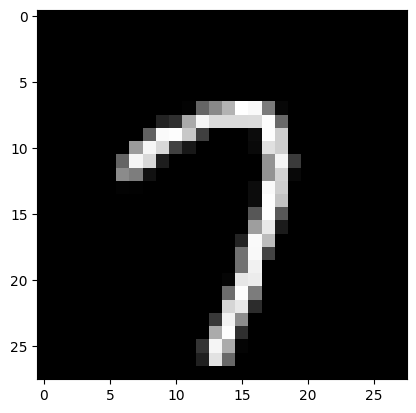

Prediction:  [7]
Label:  7


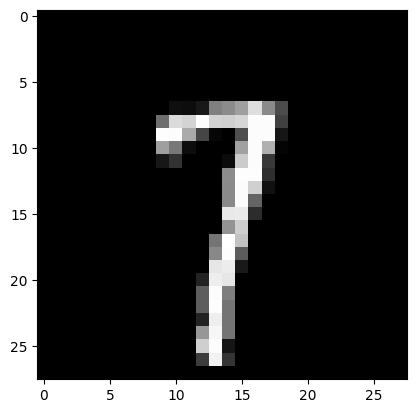

Prediction:  [8]
Label:  2


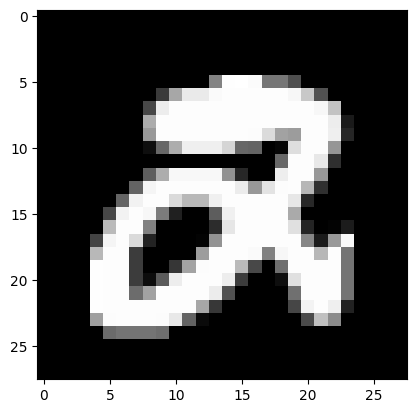

In [17]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

**After trying some of the examples let's find the accuracy on the dev set:**

In [18]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 5 4 2 9 0 8 3 2 1 0 4 6 8 6 9 7 9 4 0 5 0 5 2 6 7 5 1 1 2 6 1 2 8 7 6 6
 4 1 9 6 0 0 7 5 1 4 1 1 5 9 1 3 6 8 2 6 0 6 8 2 7 7 8 8 2 9 2 8 1 3 3 8 2
 1 8 5 5 9 0 7 3 3 9 3 2 4 7 2 2 0 2 0 1 2 6 8 9 0 0 2 1 2 3 8 5 0 2 1 5 2
 8 5 3 7 2 8 0 9 4 9 7 7 9 4 7 5 5 0 1 3 1 9 5 8 1 7 0 8 8 6 1 3 6 9 2 8 5
 8 2 7 8 6 9 5 8 7 9 0 6 0 1 2 0 2 6 7 3 1 6 6 0 1 9 6 4 7 8 3 1 0 3 5 9 7
 7 7 7 3 1 5 6 3 0 1 2 6 3 0 3 1 6 7 1 8 4 1 9 3 7 3 2 0 9 2 6 3 1 1 8 3 1
 7 8 8 8 2 3 1 1 2 9 0 2 3 3 6 0 2 7 9 6 7 6 6 6 4 0 8 7 0 4 5 0 5 0 2 9 3
 2 0 7 8 0 2 2 3 7 9 9 9 8 6 2 3 4 3 2 4 7 1 1 0 7 8 3 4 8 8 9 5 1 5 3 0 4
 3 2 6 3 8 0 0 8 6 9 7 0 7 0 9 0 3 4 0 3 9 8 7 4 8 4 2 9 5 6 8 5 8 4 8 8 3
 4 9 0 4 6 0 7 1 6 9 3 1 0 8 0 9 8 1 8 2 6 3 1 3 0 2 5 4 9 8 9 2 9 0 1 1 5
 4 2 0 4 7 8 9 1 7 4 3 6 1 4 6 6 7 7 1 1 9 3 0 8 9 5 3 4 6 2 5 0 4 0 9 5 8
 7 5 7 7 8 1 1 2 7 5 6 3 1 8 4 9 0 0 1 1 0 7 7 6 5 3 8 4 8 9 6 9 4 6 3 3 3
 7 2 0 6 6 2 3 4 1 3 9 9 3 6 2 6 8 1 4 6 8 1 8 2 4 3 9 0 4 3 4 0 6 0 1 7 8
 0 3 9 7 9 0 0 7 9 4 9 9 

np.float64(0.834)

**For the MNIST dataset, achieving 83% accuracy implies that the model has effectively learned to recognize and generalize the distinguishing features of handwritten digits.**